# CS5785 Homework 2

[Yufan Zhang](https://yufanbruce.com/) (yz2894)

Tian Jin (tj299)


In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Ignore any warnings
import warnings

warnings.filterwarnings("ignore")


In [30]:
# PATH variables
DATA_PATH = "./data/"
IMG_PATH = "./img/"
RESULT_PATH = "./result/"

if not os.path.exists(IMG_PATH):
    os.makedirs(IMG_PATH)

if not os.path.exists(RESULT_PATH):
    os.makedirs(RESULT_PATH)

## 3. Kernel Density Estimation

### a. Plot the density estimate

In [39]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

# Given data
data = np.array([26, 30, 27, 18, 75, 66, 73, 63, 56, 83]).reshape(-1, 1)

# Bandwidths to use
bandwidths = [100, 10]

# Range of x values for plotting
x_vals = np.linspace(min(data)-20, max(data)+20, 1000).reshape(-1, 1)

#### Implement with Sklearn

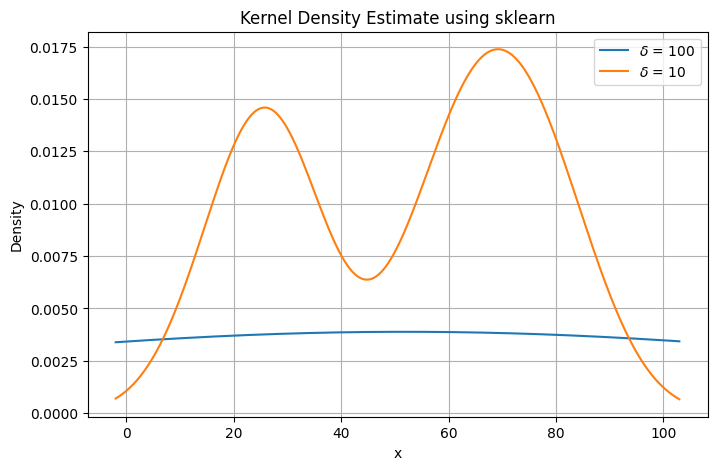

In [45]:
# Plotting using sklearn
plt.figure(figsize=(8, 5))
for bandwidth in bandwidths:
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data)
    log_dens = kde.score_samples(x_vals)
    plt.plot(x_vals, np.exp(log_dens), label=f'$\delta$ = {bandwidth}')

plt.title('Kernel Density Estimate using sklearn')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.savefig(IMG_PATH + 'sklearn_kde.png')
plt.show()

#### Implement with Numpy

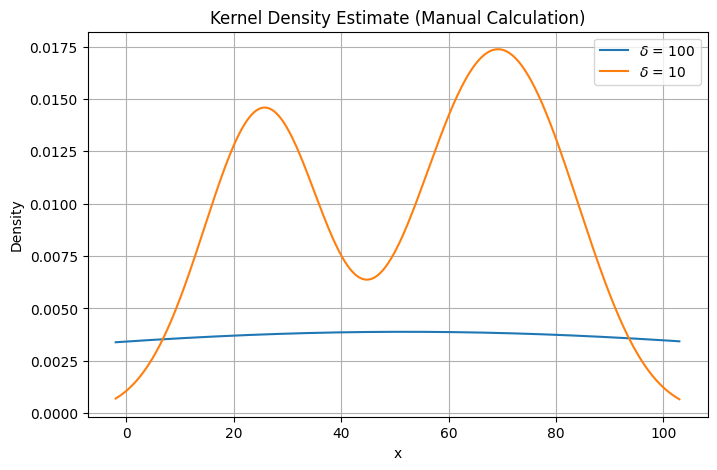

In [44]:
# Defining the Gaussian kernel function
def gaussian_kernel(u):
    return (1/np.sqrt(2*np.pi)) * np.exp(-u**2 / 2)

# Implementing KDE manually using numpy
def kde_manual(x_vals, data, bandwidth):
    densities = []
    for x in x_vals:
        sum_kernel = 0
        for xi in data:
            u = (x - xi) / bandwidth
            sum_kernel += gaussian_kernel(u)
        density = (1 / (len(data) * bandwidth)) * sum_kernel
        densities.append(density)
    return np.array(densities)

# Plotting the manually computed KDE
plt.figure(figsize=(8, 5))
for bandwidth in bandwidths:
    densities = kde_manual(x_vals.flatten(), data.flatten(), bandwidth)
    plt.plot(x_vals, densities, label=f'$\delta$ = {bandwidth}')

plt.title('Kernel Density Estimate (Manual Calculation)')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.savefig(IMG_PATH + 'manual_kde.png')
plt.show()


### b. Compare the two bandwidths

**Explain which of the above two choices of δ you think is better. Name at least one method for choosing the better δ out of the two options.**

The choice of $\delta = 10$ is a preferable choice for this dataset.

- Bandwidth $\delta = 10$: The curve is more wiggly and appears to fit closely to the data. It captures the individual peaks in the data distribution, which may indicate local variations in the data.

- Bandwidth $\delta = 100$: This curve is smoother and provides a broad overview of the data. It essentially averages out the local variations and might be oversimplifying the data distribution.

Method for choosing $\delta$:

- **Cross-Validation**: We can partition the data into training and validation sets, compute the KDE for the training set using a given bandwidth, and then evaluate how well this KDE predicts the validation set. The bandwidth that performs best (typically measured by log-likelihood) on the validation set is chosen.

- **Visual Inspection**: As demonstrated here, a visual inspection of the KDE plot for different bandwidths can give a good idea of which bandwidth provides a better representation of the data.


### c. Probability of new points

Suppose you observe two new samples: 30 and 95. Compute and report their (possibly unnormalized) probability $\hat{p}(x)$ for both δ = 100 and δ = 10.

In [46]:
# New samples
new_samples = np.array([30, 95]).reshape(-1, 1)

# Calculating densities using sklearn
densities_sklearn = {}
for bandwidth in bandwidths:
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data)
    log_dens = kde.score_samples(new_samples)
    densities_sklearn[bandwidth] = np.exp(log_dens)

# Calculating densities manually
densities_manual = {}
for bandwidth in bandwidths:
    densities = kde_manual(new_samples.flatten(), data.flatten(), bandwidth)
    densities_manual[bandwidth] = densities

densities_sklearn, densities_manual


({100: array([0.00380071, 0.00355839]), 10: array([0.01358759, 0.00292187])},
 {100: array([0.00380071, 0.00355839]), 10: array([0.01358759, 0.00292187])})

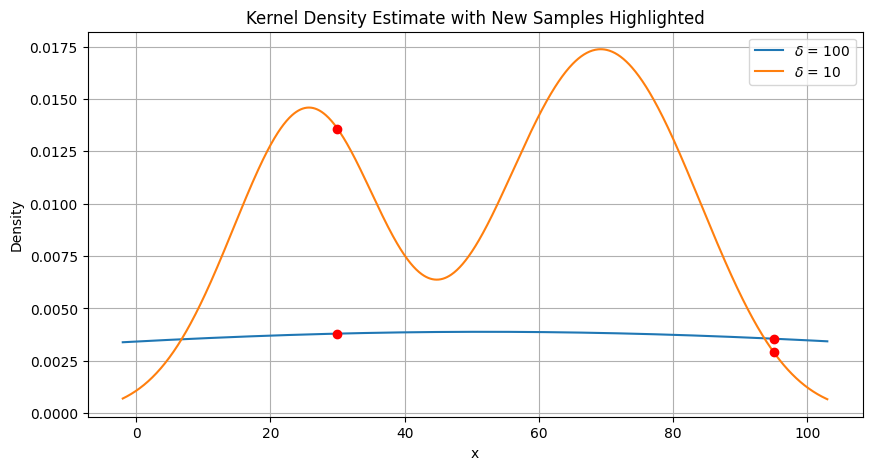

In [48]:
# Function to plot KDE with new samples highlighted
def plot_kde_with_samples(bandwidths, x_vals, data, new_samples, densities_sklearn):
    plt.figure(figsize=(10, 5))
    for bandwidth in bandwidths:
        # Plotting KDE
        densities = kde_manual(x_vals.flatten(), data.flatten(), bandwidth)
        plt.plot(x_vals, densities, label=f'$\delta$ = {bandwidth}')
        
        # Highlighting new samples
        for sample, density in zip(new_samples.flatten(), densities_sklearn[bandwidth]):
            plt.plot(sample, density, 'ro')  # red dot for new samples
    
    plt.title('Kernel Density Estimate with New Samples Highlighted')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.grid(True)
    plt.savefig(IMG_PATH + 'kde_with_samples.png')
    plt.show()

# Plotting
plot_kde_with_samples(bandwidths, x_vals, data, new_samples, densities_sklearn)


The (possibly unnormalized) densities \( \tilde{p}(x) \) at the new samples \(x = 30\) and \(x = 95\) are as follows:

- For \( \delta = 100 \):
  - \( \tilde{p}(30) \approx 0.003801 \)
  - \( \tilde{p}(95) \approx 0.003558 \)

- For \( \delta = 10 \):
  - \( \tilde{p}(30) \approx 0.013588 \)
  - \( \tilde{p}(95) \approx 0.002922 \)

These values were calculated both using `sklearn` and manually, yielding consistent results.

In [38]:
data = np.array([26, 30, 27, 18, 75, 66, 73, 63, 56, 83])
n = len(data)

def p(x, delta):
    return (1/n) * np.sum(np.exp(-((x - data)**2) / (2 * delta**2)))

# For x = 30
p_30_10 = p(30, 10)
p_30_100 = p(30, 100)

# For x = 95
p_95_10 = p(95, 10)
p_95_100 = p(95, 100)

print(f"p(30; δ = 10) = {p_30_10}")
print(f"p(30; δ = 100) = {p_30_100}")
print(f"p(95; δ = 10) = {p_95_10}")
print(f"p(95; δ = 100) = {p_95_100}")


p(30; δ = 10) = 0.34059026432517414
p(30; δ = 100) = 0.9526970855544111
p(95; δ = 10) = 0.07324039218477342
p(95; δ = 100) = 0.8919563805946004


### d. Rule to accept or reject points

Provide one possible rule by which a kernel density estimate can be used to either accept a point as being part of the data  distribution or reject it for being an outlier. Provide one scenario in which this strategy might not work.

### e. Compare Gaussian and Tophat kernels

Let’s say that instead of a Gaussian kernel, a Tophat kernel (K (x, z; δ) = 1 if ||x−z|| ≤ δ/2 else 0) is chosen for modeling. Plot the Tophat density estimate ˜p(x) of the dataset as a function of x on an interval containing the data using δ = 10. Give one example of a shortcoming of the Tophat kernel density estimate for outlier detection relative to the Gaussian kernel.

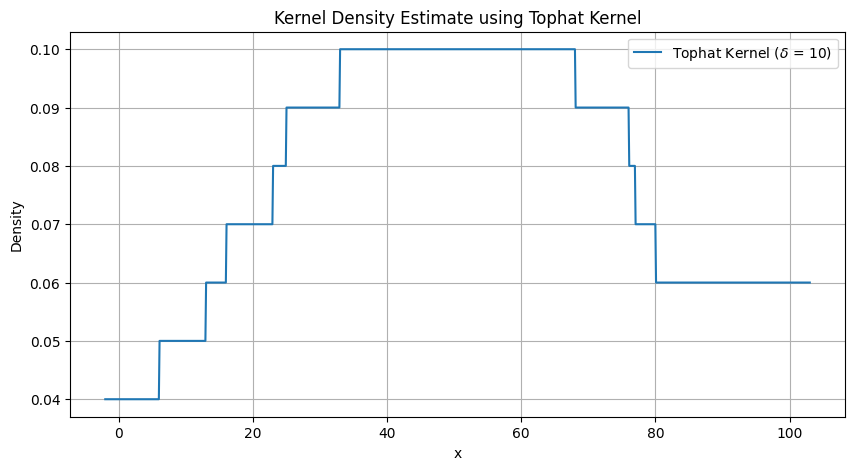

In [50]:
# Defining the Tophat kernel function
def tophat_kernel(u, delta):
    return 1 if abs(u) <= delta/2 else 0

# Implementing KDE with Tophat kernel
def kde_tophat(x_vals, data, bandwidth):
    densities = []
    for x in x_vals:
        sum_kernel = 0
        for xi in data:
            u = (x - xi) / bandwidth
            sum_kernel += tophat_kernel(u, bandwidth)
        density = (1 / (len(data) * bandwidth)) * sum_kernel
        densities.append(density)
    return np.array(densities)

# Bandwidth for Tophat kernel
bandwidth_tophat = 10

# Plotting the KDE with Tophat kernel
densities_tophat = kde_tophat(x_vals.flatten(), data.flatten(), bandwidth_tophat)
plt.figure(figsize=(10, 5))
plt.plot(x_vals, densities_tophat, label=f'Tophat Kernel ($\delta$ = {bandwidth_tophat})')
plt.title('Kernel Density Estimate using Tophat Kernel')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.savefig(IMG_PATH + 'tophat_kde.png')
plt.show()

## K-means clustering

For a dataset consisting of $n$ points, $x^{(i)} \in \mathbb{R}^d$ for $i = 1, 2, . . . n$, the goal of K-means clustering is to find a function $f : \mathbb{R}^d → {1, 2, . . . , K }$ that assigns each point to one of $K$ clusters. Each cluster is represented by a centroid, $c^{(k)} ∈ \mathbb{R}^d$ for $k = 1, 2, . . . , K$. Recall from the lecture on unsupervised learning that the K-means objective is optimized by an iterative process. For each iteration $t$, let $f_t$ denote the cluster assignment function and $c^{(k)}_t$ denote the k^th centroid. Then, at each iteration $t$, we perform two steps: (1) update cluster assignments $f_t(x^{(i)})$ for each point $x^{(i)}$ and (2) update centroids $c^{(k)}_t$ for each cluster $k = 1, 2, . . . , K$:

Initialization: set centroids $c^{(k)}_0$ randomly or using an initialization heuristic.

For $t = 1, 2, . . .$ until K-Means converges, do:

- Step 1. Update cluster assignments such that $f_t(x^{(i)}) = \argmin_k||x_{(i)} − c^{(k)}_{t−1}||_2$ is the cluster
of the closest centroid to $x^{(i)}$, where $|| · ||_2$ denotes Euclidean norm.
- Step 2. Set each centroid $c^{(k)}_t$ to be the average of its cluster. Letting $S^{(k)} = | {x^{(i)} | f_t(x^{(i)}) = k} |$ be the number of points assigned to cluster k, we refit centroids as follows:

$c^{(k)}_t = \frac{1}{S^{(k)}} \sum_{i:f_t(x^{(i)}) = k} x^{(i)}$

Letting $c_t$ (i.e., without any superscript) be a shorthand representation for all $K$ centroids ${c^{(1)}_t, c^{(2)}_t, . . . , c^{(K)}_t}$, we can express the K-means optimization objective at each time t as follows:

$J (c_t, f_t) = \sum_{i=1}^n ||x^{(i)} − c^{f_t(x^{(i)})}_t||_2$


where $c^{f_t(x^{(i)})}_t$ denotes “the centroid for the cluster assignment of $x^{(i)}$ at time $t$”. In this question, we want to prove that K-means optimization is guaranteed to converge. In other words, we want to prove that the K-means objective $J(c_t, f_t) is monotonically decreasing after each step of K-means optimization procedure:

$J (c_t, f_t ) ≤ J (c_{t−1}, f_{t−1}).$

If we prove this, then convergence follows from the monotone convergence theorem, which states that a monotonically decreasing sequence with a lower bound (the bound is $J (c_t, f_t ) ≥ 0, ∀t$ , in our case) is guaranteed to converge.

(a) Show that $J (c_{t−1}, f_t ) ≤ J (c_{t−1}, f_{t−1})$. This is equivalent to proving that the K-means objective is decreasing after updating cluster assignments (but before updating the centroids).

(b) Show that $J (c_t, f_t ) ≤ J (c_{t−1}, f_t)$. This is equivalent to proving that the K-means objective is decreasing after refitting centroids.

## Local Optima in K-mean

Depending on initialization, K-means can get stuck on local optima. Construct an example dataset, and provide two different initializations for it such that K-means would return different final clusterings on it.

In [55]:
from sklearn.cluster import KMeans

def print_clusters(X, labels):
    clusters = {}
    for i, label in enumerate(labels):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(X[i][0])
    for label, cluster in clusters.items():
        print(f"Cluster {label+1}: {cluster}")

# Define the data points
X = np.array([[0], [2], [6], [11], [12], [13]])

# Initialization 1
init_1 = np.array([[2], [12]])
kmeans_1 = KMeans(n_clusters=2, init=init_1, n_init=1, random_state=42)
kmeans_1.fit(X)
print("Initialization 1:")
print_clusters(X, kmeans_1.labels_)

# Initialization 2
init_2 = np.array([[0], [6]])
kmeans_2 = KMeans(n_clusters=2, init=init_2, n_init=1, random_state=42)
kmeans_2.fit(X)
print("\nInitialization 2:")
print_clusters(X, kmeans_2.labels_)


Initialization 1:
Cluster 1: [0, 2, 6]
Cluster 2: [11, 12, 13]

Initialization 2:
Cluster 1: [0, 2]
Cluster 2: [6, 11, 12, 13]
